<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/1_regressao_linear_simples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Formação Cientista de Dados
# Regressão linear simples

In [51]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [52]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('/content/credit_card_fraud.csv')


In [53]:
base.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [54]:
print(base.dtypes)

Transaction Date and Time                   object
Transaction Amount                         float64
Cardholder Name                             object
Card Number (Hashed or Encrypted)           object
Merchant Name                               object
Merchant Category Code (MCC)                 int64
Transaction Location (City or ZIP Code)     object
Transaction Currency                        object
Card Type                                   object
Card Expiration Date                        object
CVV Code (Hashed or Encrypted)              object
Transaction Response Code                    int64
Transaction ID                              object
Fraud Flag or Label                          int64
Previous Transactions                       object
Transaction Source                          object
IP Address                                  object
Device Information                          object
User Account Information                    object
Transaction Notes              

In [55]:
base.columns = [
    'data_hora_transacao',
    'valor_transacao',
    'nome_titular_do_cartao',
    'numero_cartao_hashed_ou_encriptado',
    'nome_comerciante',
    'codigo_categoria_comerciante_mcc',
    'localizacao_transacao_cidade_ou_cep',
    'moeda_transacao',
    'tipo_cartao',
    'data_expiracao_cartao',
    'codigo_cvv_hashed_ou_encriptado',
    'codigo_resposta_transacao',
    'identificador_transacao',
    'flag_ou_rotulo_fraude',
    'transacoes_anteriores',
    'fonte_transacao',
    'endereco_ip',
    'informacoes_dispositivo',
    'informacoes_conta_usuario',
    'notas_transacao'
]


In [57]:
colunas_float = ['valor_transacao', 'flag_ou_rotulo_fraude']

# Loop sobre as colunas e realizar a conversão
for coluna in colunas_float:
    base[coluna] = base[coluna].astype(int)

In [56]:
print(base.dtypes)

data_hora_transacao                     object
valor_transacao                        float64
nome_titular_do_cartao                  object
numero_cartao_hashed_ou_encriptado      object
nome_comerciante                        object
codigo_categoria_comerciante_mcc         int64
localizacao_transacao_cidade_ou_cep     object
moeda_transacao                         object
tipo_cartao                             object
data_expiracao_cartao                   object
codigo_cvv_hashed_ou_encriptado         object
codigo_resposta_transacao                int64
identificador_transacao                 object
flag_ou_rotulo_fraude                    int64
transacoes_anteriores                   object
fonte_transacao                         object
endereco_ip                             object
informacoes_dispositivo                 object
informacoes_conta_usuario               object
notas_transacao                         object
dtype: object


In [59]:
colunas_desnecessarias = [
    'nome_titular_do_cartao',
    'numero_cartao_hashed_ou_encriptado',
    'codigo_cvv_hashed_ou_encriptado',
    'informacoes_conta_usuario',
    'tipo_cartao',
    'data_expiracao_cartao',
    'notas_transacao',
    'nome_comerciante',
    'localizacao_transacao_cidade_ou_cep',
    'moeda_transacao',
    'identificador_transacao',
    'data_hora_transacao',
    'transacoes_anteriores',
    'fonte_transacao',
    'informacoes_dispositivo',
    'endereco_ip',
    'codigo_resposta_transacao'
]

base = base.drop(colunas_desnecessarias, axis=1)

In [60]:
base.head()

,valor_transacao,codigo_categoria_comerciante_mcc,flag_ou_rotulo_fraude
0,285,3590,1
1,1777,7277,1
2,3939,9297,1
3,376,5686,0
4,1687,2940,1


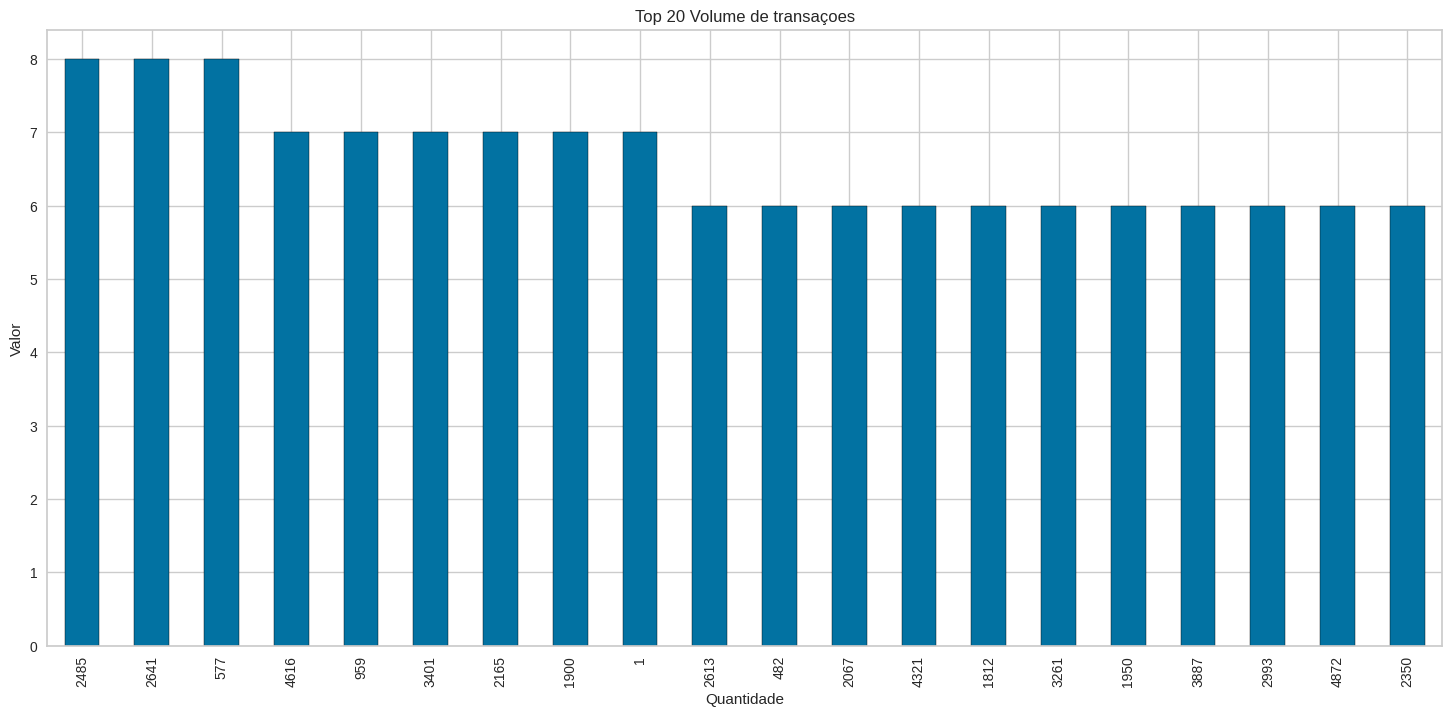

In [61]:
top_n = 20  # Defina o número desejado de principais categorias
top_localizacoes = base['valor_transacao'].value_counts().nlargest(top_n)

# Plot do gráfico de barras com as top N localizações
top_localizacoes.plot(kind='bar', edgecolor='black')
plt.xlabel('Quantidade')
plt.ylabel('Valor')
plt.title(f'Top {top_n} Volume de transaçoes')
plt.show()


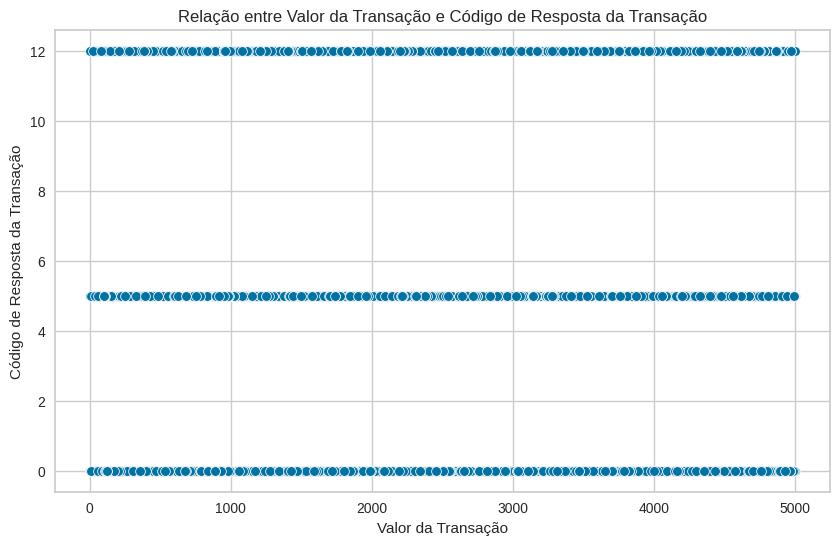

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão simples
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_transacao', y='codigo_resposta_transacao', data=base)
plt.xlabel('Valor da Transação')
plt.ylabel('Código de Resposta da Transação')
plt.title('Relação entre Valor da Transação e Código de Resposta da Transação')
plt.show()


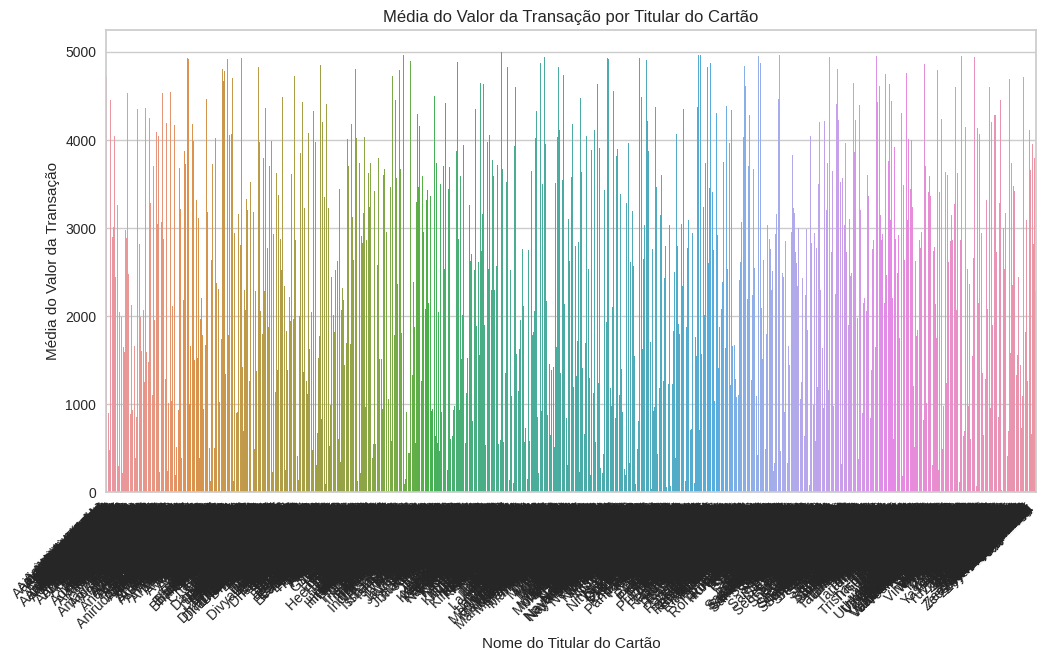

In [143]:
# Agrupe por titular do cartão e calcule a média do valor da transação
agrupado = base.groupby('nome_titular_do_cartao')['valor_transacao'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome_titular_do_cartao', y='valor_transacao', data=agrupado)
plt.xlabel('Nome do Titular do Cartão')
plt.ylabel('Média do Valor da Transação')
plt.title('Média do Valor da Transação por Titular do Cartão')
plt.xticks(rotation=45, ha='right')
plt.show()


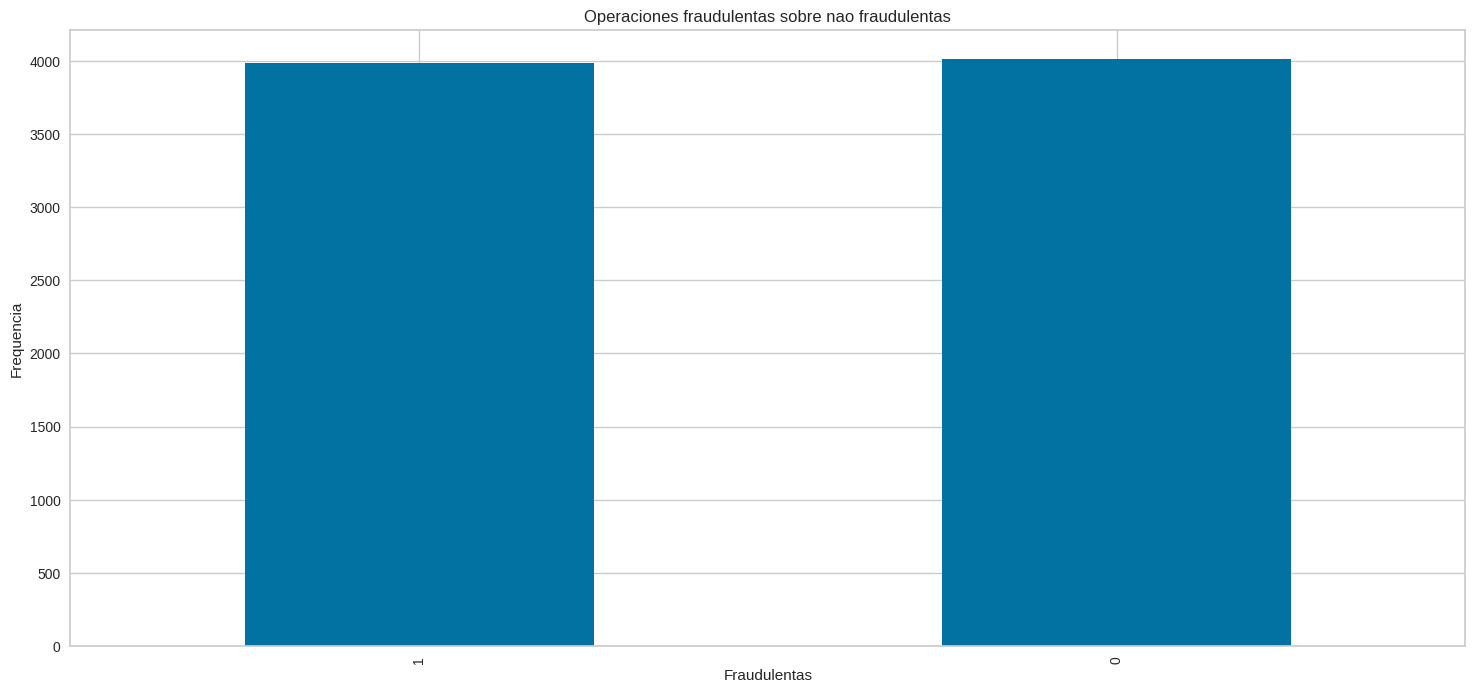

In [36]:
# Contamos quantas operaçoes são verdadeiras (0) e quantas são falsas (1)
count_classes= pd.value_counts(base['flag_ou_rotulo_fraude'], sort = False)

# Método válido para clasificar as categorias
# count_classes es una serie
count_classes.plot(kind='bar')
plt.title("Operaciones fraudulentas sobre nao fraudulentas")
plt.xlabel("Fraudulentas")
plt.ylabel("Frequencia")
plt.show()


<ipython-input-145-30a4fe078e88>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'data_hora_transacao')

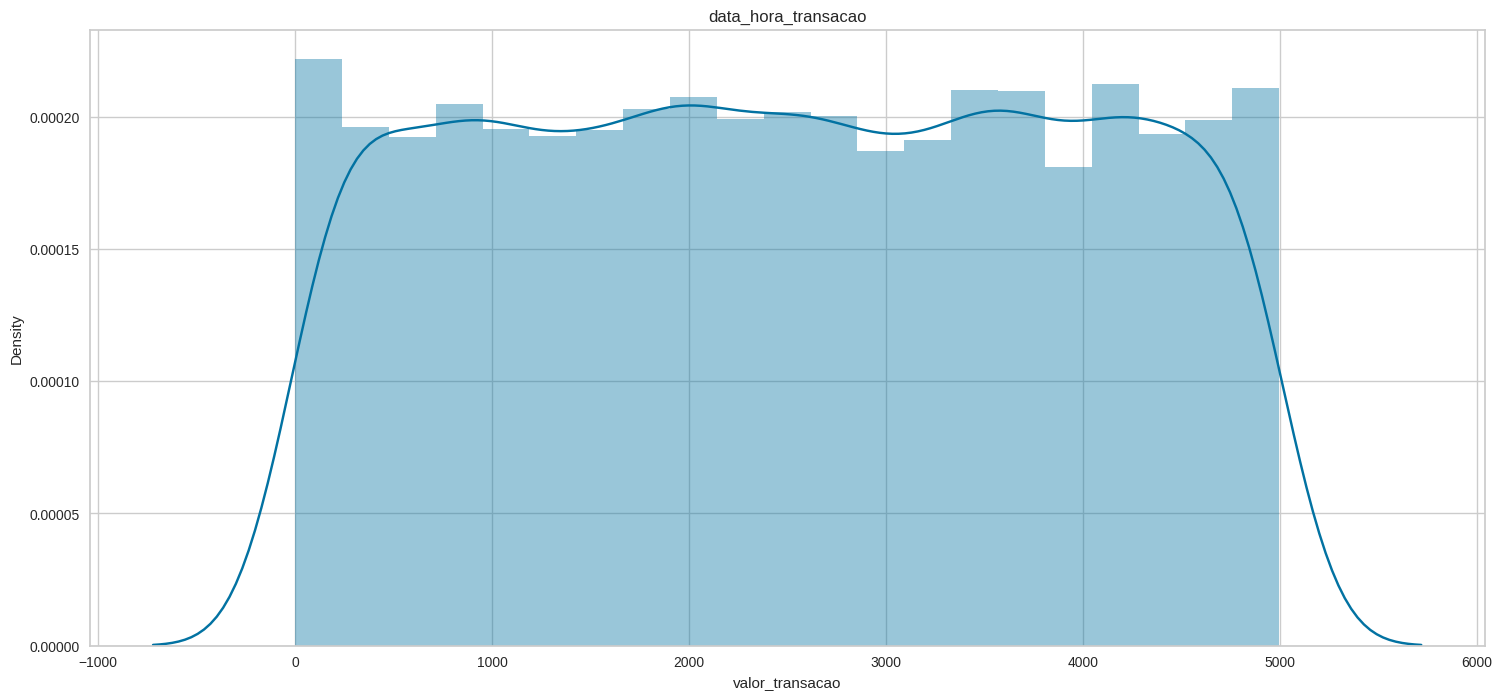

In [145]:
sns.distplot(base['valor_transacao']).set_title('data_hora_transacao')

In [37]:
# Colunas do meu DataSet
print(base.columns)







Index(['valor_transacao', 'codigo_categoria_comerciante_mcc',
       'codigo_resposta_transacao', 'flag_ou_rotulo_fraude'],
      dtype='object')


In [38]:
base.head()

,valor_transacao,codigo_categoria_comerciante_mcc,codigo_resposta_transacao,flag_ou_rotulo_fraude
0,285,3590,5,1
1,1777,7277,12,1
2,3939,9297,5,1
3,376,5686,5,0
4,1687,2940,5,1


<Axes: ylabel='Frequency'>

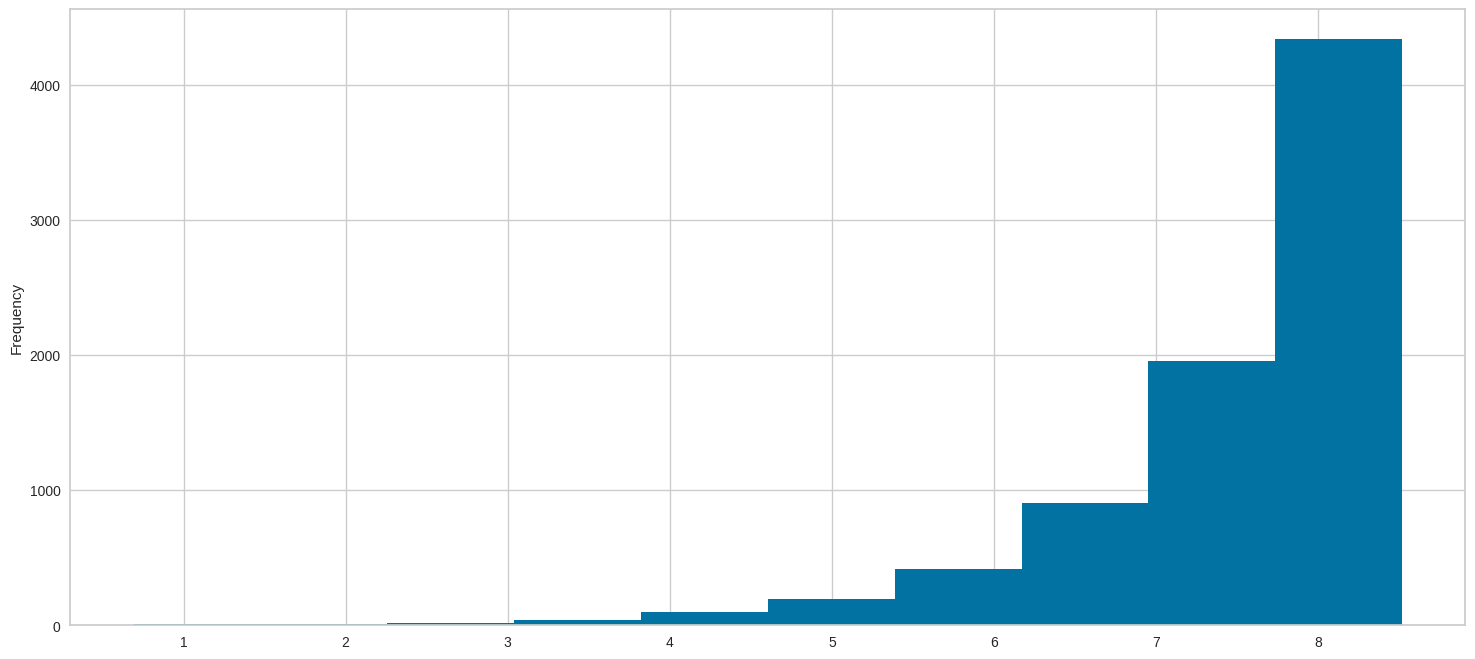

In [39]:
# Aplicando fórmulas no Data Frame
base['logvalor_transacao'] = np.log(base['valor_transacao']+1)
# Para destribuir em um histograma
base['logvalor_transacao'].sort_values().plot.hist()

In [62]:
# Escalamos la variable amount

from sklearn.preprocessing import StandardScaler
base['normvalor_transacao'] = StandardScaler().fit_transform(base['valor_transacao'].values.reshape (-1,1))
base = base.drop (['codigo_categoria_comerciante_mcc','valor_transacao'], axis = 1);

In [63]:
X = base.iloc[:, base.columns != 'flag_ou_rotulo_fraude']
y = base.iloc[:, base.columns == 'flag_ou_rotulo_fraude']
len(y[y.flag_ou_rotulo_fraude ==1]);

In [64]:

# Contamos qual o número de fraude que existe ¡¡
number_records_fraud = len (base[base.flag_ou_rotulo_fraude==1])
# Y extraímos os indices de casos que não são fraude
fraud_indices = np.array (base[base.flag_ou_rotulo_fraude==1].index)
normal_indices = np.array (base[base.flag_ou_rotulo_fraude==0].index)




In [65]:
# Obtenemos de forma aleatoria un número de indices de no fraude, igual al de fraude
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# Unimos en un solo array los indices de fraude con los de no fraude escogidos aleatoriamente
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [66]:
# Ahora escogemos los valores de dichos indices
under_sample_data = base.iloc[under_sample_indices,:]
# Separamos la X de la y de nuevo
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'flag_ou_rotulo_fraude'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'flag_ou_rotulo_fraude'];

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [68]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [69]:
MLPC = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5269461077844312